In [1]:
%config InlineBackend.figure_formats = ['svg']

import sympy as sp 
from sympycalcs import render, convert
import sympy.physics.units as unit
from sympy.abc import *
import numpy as np


import matplotlib.pyplot as plt

sp.init_printing(use_latex='mathjax', latex_mode='equation*')

# Beispiel: Antwortspektrenverfahren an einem dreistöckigen Gebäude

![Dreigeschossiges Gebäude](bilder/mms_7_modell.png){#fig-3mms height=50%}

{{< pagebreak >}}
## Musterlösung

![Gebäude modelliert als Mehrmassenschwinger](bilder/system_mms3.png){height=50mm}

In [2]:
#| label: tbl-parameter_mms6
#| tbl-cap: Verwendete Parameter

params = {'EI_1': 2.1*10**6 *unit.N*unit.m**2,
          'EI_2': 2.1*10**6 *unit.N*unit.m**2,
          'EI_3': 1.5*10**6 *unit.N*unit.m**2,
          'm_1':12000*unit.N*unit.second**2/unit.m,
          'm_2':12000*unit.N*unit.second**2/unit.m,
          'm_3':8000*unit.N*unit.second**2/unit.m,
          'H_1':4.5*unit.m,
          'H_2':4.25*unit.m,
          'H_3':4.25*unit.m,
          }

params_plot = convert.param_value(params)
render.dict_to_table(params)

| Parameter |  |
|---|---|
| $EI_{1} = 2100000.0 \text{m}^{2} \text{N}$ | $EI_{2} = 2100000.0 \text{m}^{2} \text{N}$ |
| $EI_{3} = 1500000.0 \text{m}^{2} \text{N}$ | $H_{1} = 4.5 \text{m}$ |
| $H_{2} = 4.25 \text{m}$ | $H_{3} = 4.25 \text{m}$ |
| $m_{1} = \frac{12000 \text{N} \text{s}^{2}}{\text{m}}$ | $m_{2} = \frac{12000 \text{N} \text{s}^{2}}{\text{m}}$ |
| $m_{3} = \frac{8000 \text{N} \text{s}^{2}}{\text{m}}$ | |


### Massenmatrix $M$

![System an jeder Punktmasse ausgelenkt](bilder/matrix_3mms.png){height=50mm}

In [3]:
m_1, m_2, m_3 = sp.symbols('m_1, m_2, m_3')

In [4]:
M = sp.Matrix([[m_1,0,0],[0,m_2,0],[0,0,m_3]])

render.eq_display(sp.MatrixSymbol('M', 3, 3), M,
                  sp.MatrixSymbol('M', 3, 3), M.subs(params))

    ⎡m₁  0   0 ⎤
    ⎢          ⎥
M = ⎢0   m₂  0 ⎥
    ⎢          ⎥
    ⎣0   0   m₃⎦

    ⎡                   2                                           ⎤
    ⎢12000⋅newton⋅second                                            ⎥
    ⎢────────────────────           0                     0         ⎥
    ⎢       meter                                                   ⎥
    ⎢                                                               ⎥
    ⎢                                         2                     ⎥
    ⎢                      12000⋅newton⋅second                      ⎥
M = ⎢         0            ────────────────────           0         ⎥
    ⎢                             meter                             ⎥
    ⎢                                                               ⎥
    ⎢                                                              2⎥
    ⎢                                            8000⋅newton⋅second ⎥
    ⎢         0                     0            ───────────────────⎥
    ⎣                                                   meter       ⎦

### Steifigkeitsmatrix $K$

#### Steifigkeit der Stockwerke

In [5]:
EI_1, EI_2, EI_3, H_1, H_2, H_3 = sp.symbols("EI_1, EI_2, EI_3, H_1, H_2, H_3")


In [6]:
k_1 = 12 * EI_1 /H_1**3 * 2
k_2 = 12 * EI_2 / H_2**3 * 2 
k_3 = 12 * EI_3 / H_3**3 * 2 

render.eq_display("k_1", k_1,
'k_1', k_1.subs(params).simplify().evalf(3),
"k_2", k_2,
'k_2', k_2.subs(params).simplify().evalf(3),
"k_3", k_3,
'k_3', k_3.subs(params).simplify().evalf(3))

     24⋅EI₁
k₁ = ──────
        3  
      H₁   

     5.53e+5⋅newton
k₁ = ──────────────
         meter     

     24⋅EI₂
k₂ = ──────
        3  
      H₂   

     6.57e+5⋅newton
k₂ = ──────────────
         meter     

     24⋅EI₃
k₃ = ──────
        3  
      H₃   

     4.69e+5⋅newton
k₃ = ──────────────
         meter     

Abgefüllt in die Steifigkeitsmatrix

In [7]:
K = sp.Matrix([[k_1 + k_2, -k_2, 0],[-k_2,k_2+k_3, -k_3], [0,-k_3, k_3]])

render.eq_display(sp.MatrixSymbol('K', 3, 3), "Matrix([[k_1 + k_2, -k_2, 0],[-k_2,k_2+k_3, -k_3], [0,-k_3, k_3]])",
sp.MatrixSymbol('K', 3, 3), K,
                  sp.MatrixSymbol('K', 3, 3), K.subs(params).evalf(3))

    ⎡k₁ + k₂    -k₂     0 ⎤
    ⎢                     ⎥
K = ⎢  -k₂    k₂ + k₃  -k₃⎥
    ⎢                     ⎥
    ⎣   0       -k₃    k₃ ⎦

    ⎡24⋅EI₁   24⋅EI₂     -24⋅EI₂               ⎤
    ⎢────── + ──────     ────────         0    ⎥
    ⎢   3        3           3                 ⎥
    ⎢ H₁       H₂          H₂                  ⎥
    ⎢                                          ⎥
    ⎢   -24⋅EI₂       24⋅EI₂   24⋅EI₃  -24⋅EI₃ ⎥
    ⎢   ────────      ────── + ──────  ────────⎥
K = ⎢       3            3        3        3   ⎥
    ⎢     H₂           H₂       H₃       H₃    ⎥
    ⎢                                          ⎥
    ⎢                    -24⋅EI₃        24⋅EI₃ ⎥
    ⎢       0            ────────       ────── ⎥
    ⎢                        3             3   ⎥
    ⎣                      H₃            H₃    ⎦

    ⎡ 1.21e+6⋅newton   -6.57e+5⋅newton                   ⎤
    ⎢ ──────────────   ────────────────         0        ⎥
    ⎢     meter             meter                        ⎥
    ⎢                                                    ⎥
    ⎢-6.57e+5⋅newton    1.13e+6⋅newton   -4.69e+5⋅newton ⎥
K = ⎢────────────────   ──────────────   ────────────────⎥
    ⎢     meter             meter             meter      ⎥
    ⎢                                                    ⎥
    ⎢                  -4.69e+5⋅newton    4.69e+5⋅newton ⎥
    ⎢       0          ────────────────   ────────────── ⎥
    ⎣                       meter             meter      ⎦

### Eigenvektoren 

#### Eigenkreisfrequenzen 
Bei einem Mehrmassenschwinger gibt es entsprechend den Freiheitsgraden Eigenkreisfrequenzen $\omega_n$. Diese lassen sich anhand folgender Gleichung bestimmen:

$$
\det{[\mathbf{K}-\omega_n^2 \mathbf{M}]=0}
$${#eq-eigenkreisfreqs}

In [8]:
omega_n =sp.symbols('omega_n', real=True)
eq_omega = sp.det(K-omega_n**2*M)
omega_n_solve= sp.solve([eq_omega.subs(params_plot).simplify(), omega_n<=100, omega_n>=0], omega_n, dict=True)

omega_1 = omega_n_solve.args[0].rhs/unit.second
omega_2 = omega_n_solve.args[1].rhs/unit.second
omega_3 = omega_n_solve.args[2].rhs/unit.second



render.eq_display('omega_1', omega_1.evalf(3),
                  'omega_2', omega_2.evalf(3),
                  'omega_3', omega_3.evalf(3))



      3.4  
ω₁ = ──────
     second

      8.84 
ω₂ = ──────
     second

      12.8 
ω₃ = ──────
     second

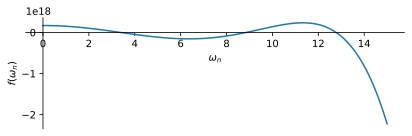

In [9]:
#| label: fig-loesung_eigenkreisfrequenzen
#| fig-cap: Nullstellen der @eq-eigenkreisfreqs
          
sp.plot(eq_omega.subs(params_plot).evalf(5).simplify(), (omega_n, 0,15),size=(5.9,2), show=False).show()

#### Eigenvektoren $\phi$
Durch das Einsetzen der bestimmten Eigenkreisfrequenzen lassen sich die Eigenvektoren bestimmen. 
Die Einträge des Eigenvektors sind voneinander abhängig und lassen sich dem entsprechen beliebig definieren. Grundsätzlich wird der maximale Eigenwert zu $1$ gesetzt.

$$\mathbf{K} - \omega_n^2 \mathbf{M} \phi_n= 0$$

In [20]:
sp.solve(list(((K-(omega_1*unit.second)**2 *M)*phi_1).subs(params_plot)))

[]

In [14]:
phi_11, phi_21, phi_31 = sp.symbols('phi_11, phi_21, phi_31')
params['phi_11'] = 1
phi_1 = sp.Matrix([[phi_11], [phi_21], [phi_31]])

phi_solve = list(sp.solve((K-omega_1**2 *M)*phi_1))


phi_solve

[0.0, 0.0, 0.0]

In [15]:
sp.solve(list(((K-omega_1**2*M)*phi_1).subs(params_plot)))

{φ₁₁: 0.0, φ₂₁: 0.0, φ₃₁: 0.0}

In [12]:


params['phi_21'] = phi_21.subs(params).simplify() 
params['phi_11'] = 1/phi_21.subs(params).simplify() 
params['phi_21'] = 1


render.eq_display(sp.MatrixSymbol('phi_1', 2,1),sp.simplify(phi_1.subs(params)).evalf(3))

False

In [13]:
phi_12, phi_22 = sp.symbols('phi_12, phi_22')
params['phi_12'] = 1

phi_2 = sp.Matrix([[phi_12], [phi_22]])

phi_22 = list(sp.solve((K-omega_2**2 *M)*phi_2, phi_22).values())[0]

params['phi_22'] = phi_22.subs(params).simplify() 




render.eq_display(sp.MatrixSymbol('phi_2', 2,1),sp.simplify(phi_2.subs(params)).evalf(3))

ShapeError: Matrix size mismatch: (3, 3) * (2, 1).